# Importing Tools:

In [2]:
# Directory Tools:
import os
# Asthetic Tools:
from IPython.display import display # Print tables with better formatting (> print)
import warnings
# Data Exploration Tools:
import pandas as pd
import numpy as np
# Data Visualization Tools:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
# NLP tools:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer # Lemmatization Tools
from nltk.collocations import * #Bigrams/Trigrams
from nltk.corpus import wordnet as wn # Word Disambiguating
from nltk.wsd import lesk # Word Disambiguating
import re # To split text
from nltk.corpus import stopwords # For stop words
from string import punctuation # Punction list of stop words
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# Imbalanced Learned (For Underepresented Classifications Labels)
from imblearn.under_sampling import  RandomUnderSampler # Random Undersampling
from imblearn.under_sampling import ClusterCentroids # Cluster Undersampling
from imblearn.under_sampling import NearMiss # Nearmiss Undersampled
from imblearn.over_sampling import RandomOverSampler # Random Oversampling
from imblearn.over_sampling import SMOTE # SMOTE Oversampling
from imblearn.combine import SMOTEENN # SMOTEENN Combination
from imblearn.combine import SMOTETomek # SMOTETomek Combination

# Getting Directory:

In [6]:
os.getcwd() # Check
os.chdir('C:/Users/jdavo/OneDrive/Documents/Datasets/Industrial Safety') # Use forward slashes
os.getcwd() # Validate

'C:\\Users\\jdavo\\OneDrive\\Documents\\Datasets\\Industrial Safety'

# Data Exploration:

### Importing Data

In [7]:
data = pd.read_csv('isahd.csv')

### Viewing Data

In [8]:
# Viewing Data Information
print('Column Names')
display(data.columns)
print('Top 5')
display(data.head())
print('Bottom 5')
display(data.tail())
print('Data Information')
display(data.describe())
display(data.info())

Column Names


Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

Top 5


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Bottom 5


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...
424,438,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ..."


Data Information


,Unnamed: 0
count,425.000000
mean,224.084706
std,125.526786
min,0.000000
25%,118.000000
50%,226.000000
75%,332.000000
max,438.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
Unnamed: 0                  425 non-null int64
Data                        425 non-null object
Countries                   425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Genre                       425 non-null object
Employee or Third Party     425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


None

# Data Processing:

### Column Type Conversion

In [9]:
# Converting data to correct types
del data['Unnamed: 0']
catcols = ['Countries', 'Potential Accident Level', 'Critical Risk', \
           'Industry Sector','Local', 'Genre', 'Employee or Third Party']
for cols in catcols:
    data[cols] = data[cols].astype('category')
data.Data = pd.to_datetime(data.Data, format='%Y-%m-%d %H:%M:%S')
data.rename(columns={'Data':'Date'}, inplace=True)

Separate the description data by each word and count the number of times it appears (__TOKENIZATION__). The words were also put into a dictionary where the key is the word and the value is the count of that word per description. The words have also been lematized to their basic form to pair up similar words (__LEMMATIZATION__). Stop words from NLTK, Punctation and spaces have been taken out and a dataframe has been created out of the new dictionary.

### Language Processing

In [10]:
# Preprocessing Set up:
stop_words = set(stopwords.words('english') + list(punctuation) + [' ', 'wa'])
r = {}
k = {}
lemmatizer = WordNetLemmatizer()

zs = []
# Body: Tokenize/Lemmatize
for d in range(len(data)):
    bs = data['Description'][d].split(' ')
    count = 0
    z = []
    for b in bs:
        b = re.sub('[^a-zA-Z0-9]', '', b).lower().strip() # Take out special characters in words     
        lemb = lemmatizer.lemmatize(b) # Word Lemmatizing
        if lemb in stop_words:
            pass
        if lemb not in stop_words:
            z.append(lemb)
            if lemb in r.keys():
                r[lemb] += 1
            elif lemb not in r.keys():
                r[lemb] = 1     
        count += 1
    k[d] = r
    r = {}
    zs.extend(z)
    
# Output: Into Dataframe
vectorizer = TfidfVectorizer(min_df=1, stop_words = stop_words) #Initiating TfidfVectorizer
matrix = vectorizer.fit_transform(data1['Description'])
idf = pd.DataFrame(vectorizer.idf_)
a = vectorizer.get_feature_names()
c = pd.DataFrame(matrix.toarray()[0])
e = pd.DataFrame(matrix.toarray())
e.columns = a
data_wvect = pd.concat([data, e], axis=1)
data_wcountvect = pd.concat([data_wcount, e], axis=1)

word_set = pd.DataFrame(k).transpose()
data_wcount = pd.concat([data, word_set], axis=1, join='inner')
display(data_wcount.head())

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,...,z014,z132,z332,zaf,zamac,zero,zinc,zinco,zn,zone
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


,Freq
Bigram,
"(left, hand)",70
"(right, hand)",57
"(time, accident)",56
"(causing, injury)",55
"(finger, left)",25


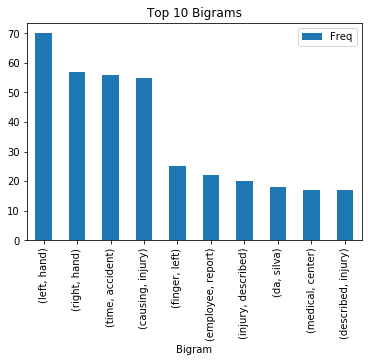

In [16]:
# Bigram List (Most frequent Bigrams)
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(zs)
ngram = list(finder.ngram_fd.items())
bigram = pd.DataFrame(ngram).sort_values(1, ascending=False).rename(columns={0:'Bigram',1:'Freq'}).set_index('Bigram')
display(bigram.head())
bigram.iloc[:10].plot(kind='bar')
plt.title('Top 10 Bigrams')
plt.show()

,Trigram,Freq
1490,"(finger, left, hand)",24
196,"(causing, injury, described)",15
1226,"(finger, right, hand)",14
2919,"(injury, time, accident)",13
3957,"(time, accident, employee)",9


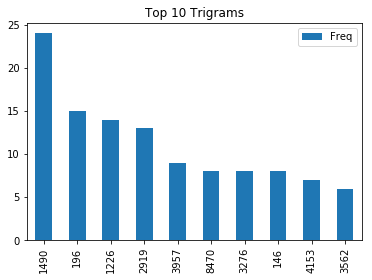

In [15]:
# Trigram List (Most Frequent Trigrams)
trigram_measure = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(zs, 3)
ngram = list(finder.ngram_fd.items())
trigram = pd.DataFrame(ngram).sort_values(1, ascending=False).rename(columns={0:'Trigram',1:'Freq'})
display(trigram.head())
trigram.iloc[:10].plot(kind='bar')
plt.title('Top 10 Trigrams')
plt.show()

In [68]:
Total2 = data_wvect.sum().sort_values(ascending=True)
Country = data_wvect.groupby('Countries').mean()
Alevel = data_wvect.groupby('Accident Level').mean()
Isector = data_wvect.groupby('Industry Sector').mean()
display(Total2)
display(Country.head())

jack           0.000243
firmly         0.000243
composition    0.000243
600            0.000243
stems          0.000243
dtype: float64

,00,001,007,01,018,0183,02,020,02bp0166,02bp0167,...,yolk,young,z014,zaf,zamac,zero,zinc,zinco,zn,zone
Countries,,,,,,,,,,,,,,,,,,,,,
Country_01,0.005691,0.000711,0.000702,0.005061,0.002055,0.00000,0.004015,0.000000,0.000000,0.000000,...,0.000777,0.000758,0.000724,0.000713,0.000000,0.000643,0.004523,0.000000,0.000772,0.003371
Country_02,0.000000,0.000000,0.000000,0.003114,0.000000,0.00000,0.000000,0.002419,0.003678,0.003678,...,0.000000,0.000000,0.000000,0.000000,0.001871,0.000000,0.007269,0.001593,0.002663,0.000000
Country_03,0.012008,0.000000,0.000000,0.011103,0.000000,0.00514,0.021393,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
quick = data_wcount.loc[:, ['finger', 'Industry Sector']].groupby('Industry Sector').sum()
uniIndustry = data_wcount.loc[:, 'Industry Sector'].unique()
total = {}
for i in uniIndustry:
    total[i] = len(data_wcount[data_wcount.loc[:, 'Industry Sector'] == i])

total = pd.DataFrame([total], columns=total.keys()).transpose()
display(total)
new = pd.concat([quick, total], axis=1).rename(columns={0:'Total'})
new['percent'] = new.finger/new.Total
new

,0
Mining,241
Metals,134
Others,50


,finger,Total,percent
Metals,22.0,134,0.164179
Mining,49.0,241,0.203320
Others,5.0,50,0.100000


In [20]:
bs_data = data_wcount
percentages = []
num = 1000
for _ in range(num):
    total_bs = {}
    bs_is = np.random.permutation(data_wcount.loc[:, 'Industry Sector'])
    bs_data['Industry Sector'] = bs_is
    quick_bs = bs_data.loc[:, ['finger', 'Industry Sector']].groupby('Industry Sector').sum()
    for i in uniIndustry:
        total_bs[i] = len(bs_data[bs_data.loc[:, 'Industry Sector'] == i])
    total_bs = pd.DataFrame([total_bs], columns=total_bs.keys()).transpose()
    new_bs = pd.concat([quick_bs, total_bs], axis=1).rename(columns={0:'Total'})
    percentages.append(new_bs.finger/new_bs.Total)

C:\Users\jdavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if sys.path[0] == '':


In [332]:
?sns.distplot()

Finger:


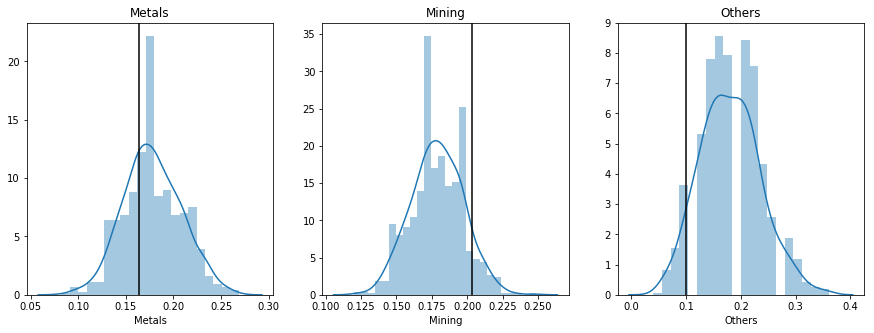

In [27]:
percentages = pd.DataFrame(percentages)
f, axs = plt.subplots(1,3,figsize=(15,5))
warnings.simplefilter("ignore")
print('Finger:')
plt.subplot(1, 3, 1)
sns.distplot(percentages['Metals'])
plt.axvline(new.loc['Metals', 'percent'], color='black')
plt.title('Metals')

plt.subplot(1, 3, 2)
sns.distplot(percentages['Mining'])
plt.axvline(new.loc['Mining', 'percent'], color='black')
plt.title('Mining')

plt.subplot(1, 3, 3)
sns.distplot(percentages['Others'])
plt.axvline(new.loc['Others', 'percent'], color='black')
plt.title('Others')
plt.show()


Grouping data in different formats for the plots below
Later this will be done in the plotting cells instead of the one below.

In [30]:
# Groupings For Data Visualization
AL = data_wcount.groupby('Accident Level').sum()
PAL = data_wcount.groupby('Potential Accident Level').sum()

ALIS = data_wcount.groupby(['Accident Level', 'Industry Sector']).sum()
PALIS = data_wcount.groupby(['Potential Accident Level', 'Industry Sector']).sum()

ALC = data_wcount.groupby(['Accident Level', 'Countries']).sum()

ALCL = data_wcount.groupby(['Accident Level', 'Countries', 'Local']).sum()

#tot = ALIS.loc['I'].sum().rename('Total')

#.sort_values(by=tot, ascending=False, axis=1).iloc[:, :10]


#ALIS.loc['V', :].sort_values(by=ALIS.sum().sort_values(ascending=False), axis=1, ascending=False).iloc[:,:10].transpose().plot(kind='bar', stacked=True)

ALIS

001  0010  007   01  01022017  01242017  \
Accident Level Industry Sector                                                  
I              Metals           44.0  0.0   0.0  0.0  1.0       0.0       1.0   
               Mining           54.0  0.0   0.0  0.0  2.0       1.0       0.0   
               Others           12.0  0.0   0.0  0.0  0.0       0.0       0.0   
II             Metals            1.0  0.0   0.0  0.0  1.0       0.0       0.0   
               Mining            4.0  0.0   1.0  0.0  1.0       0.0       0.0   
               Others            0.0  0.0   0.0  0.0  0.0       0.0       0.0   
III            Metals            6.0  0.0   0.0  0.0  0.0       0.0       0.0   
               Mining           10.0  1.0   0.0  0.0  0.0       0.0       0.0   
               Others            2.0  0.0   0.0  0.0  0.0       0.0       0.0   
IV             Metals            5.0  0.0   0.0  0.0  0.0       0.0       0.0   
               Mining           14.0  0.0   0.0  1.0  2.0       0.0       0.0   
               Others            0.0  0.0   0.0  0.0  0.0       0.0       0.0   
V              Metals            3.0  0.0   0.0  0.0  0.0       0.0       0.0   
               Mining            3.0  0.0   0.0  0.0  0.0       0.0       0.0   
               Others            0.0  0.0   0.0  0.0  0.0       0.0       0.0   

                                0130  0150  018  ...   z014  z132  z332  zaf  \
Accident Level Industry Sector                   ...                           
I              Metals            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
               Mining            1.0   0.0  1.0  ...    0.0   0.0   0.0  0.0   
               Others            0.0   0.0  1.0  ...    0.0   0.0   0.0  0.0   
II             Metals            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
               Mining            0.0   0.0  1.0  ...    0.0   0.0   0.0  0.0   
               Others            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
III            Metals            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
               Mining            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
               Others            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
IV             Metals            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
               Mining            0.0   0.0  0.0  ...    0.0   0.0   0.0  1.0   
               Others            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
V              Metals            0.0   1.0  0.0  ...    1.0   1.0   1.0  0.0   
               Mining            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   
               Others            0.0   0.0  0.0  ...    0.0   0.0   0.0  0.0   

                                zamac  zero  zinc  zinco   zn  zone  
Accident Level Industry Sector                                       
I              Metals             1.0   0.0   3.0    0.0  0.0   4.0  
               Mining             0.0   0.0   5.0    1.0  2.0   0.0  
               Others             0.0   0.0   2.0    0.0  0.0   0.0  
II             Metals             0.0   0.0   0.0    0.0  0.0   0.0  
               Mining             0.0   0.0   0.0    0.0  0.0   0.0  
               Others             0.0   0.0   0.0    0.0  0.0   0.0  
III            Metals             0.0   0.0   0.0    0.0  0.0   0.0  
               Mining             0.0   1.0   1.0    0.0  0.0   1.0  
               Others             0.0   0.0   0.0    0.0  0.0   0.0  
IV             Metals             0.0   0.0   0.0    0.0  0.0   0.0  
               Mining             0.0   0.0   0.0    0.0  0.0   1.0  
               Others             0.0   0.0   0.0    0.0  0.0   0.0  
V              Metals             0.0   0.0   0.0    0.0  0.0   0.0  
               Mining             0.0   0.0   0.0    0.0  0.0   0.0  
               Others             0.0   0.0   0.0    0.0  0.0   0.0  

[15 rows x 3201 columns]

## What are the most Frequent Risk?

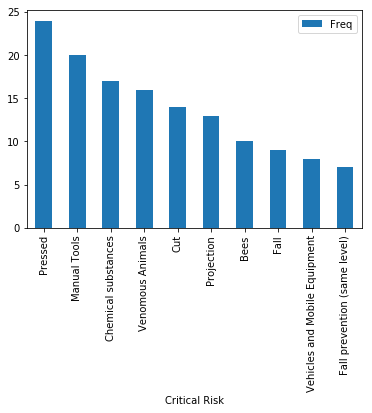

,Freq
Critical Risk,
Pressed,24
Manual Tools,20
Chemical substances,17
Venomous Animals,16
Cut,14
Projection,13
Bees,10
Fall,9
Vehicles and Mobile Equipment,8


In [70]:
risk = data.groupby('Critical Risk').count()['Date'].sort_values(ascending=False)
risk = pd.DataFrame(risk).rename(columns={'Date':'Freq'})
risk = risk.drop('Others')
risk.iloc[:10].plot(kind='bar')
plt.show()
display(risk.iloc[:10])

For the 10 most common words in the __"Others"__ industry what is the distribution by country.
The purpose of this plot is to show if there's a difference between the countries and in the "Others" industries.
May need to use plot animation to scroll through more words than just the top 10.

For the 10 most common words in the __"Mining"__ industry what is the distribution by country.
The purpose of this plot is to show if there's a difference between the countries and the Mining industry.
May need to use plot animation to scroll through more words than just the top 10.

For the 10 most common words in the __"Metals"__ industry what is the distribution by country.
The purpose of this plot is to show if there's a difference between the countries and the Metals industry.
May need to use plot animation to scroll through more words than just the top 10.

Plotting the values by Accident Level and Country to the distribution of the word count by location (10 most common). 
This plot is okay but it may be better to show the probability distribution between location instead.
May need to add scroll bar here too.

This shows the word frequency for each Accident Level based of each country (only showing the 10 most common words).
This let's us visually see if there's a difference between the Country and for each Accident Level.
May need to add some animation scroll to show more than just the top 10.

This shows the word frequency for each Accident Level based of each industry (only showing the 10 most common words).
This let's us visually see if there's a difference between the Industry sectors and for each Accident Level.
May need to add some animation scroll to show more than just the top 10.

This shows the word count for each Accident Level based of each industry (only showing the 10 most common words).
This let's us visually see if there's a difference between the Industry sectors and for each Accident Level.
May need to add some animation scroll to show more than just the top 10.
May need to change chart to a frequency bar graph to show distribution better.
Couldn't get these plots to go up next to the other Potential Accident Level plots.

This shows the word count for each Potential Accident Level based of each industry (only showing the 10 most common words).
This let's us visually see if there's a difference between the Industry sectors and for each Potential Accident Level.
May need to add some animation scroll to show more than just the top 10.
May need to change chart to a frequency bar graph to show distribution better.
Couldn't get these plots to go up next to the other Accident level plots.

This a bar chart showing the 15 most common words for Accident Level and Potential Accident Level

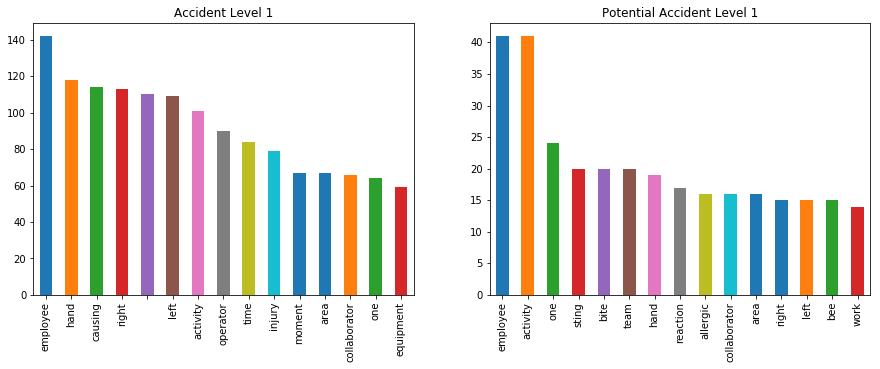

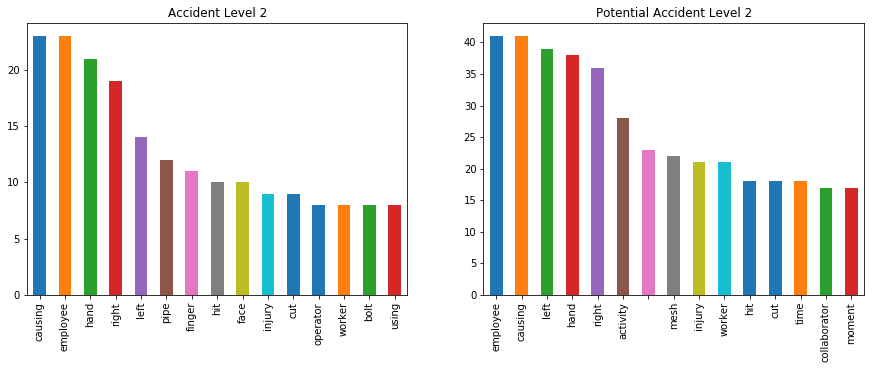

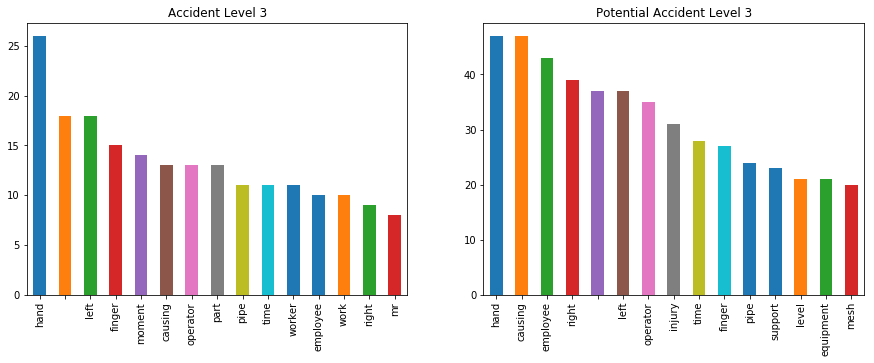

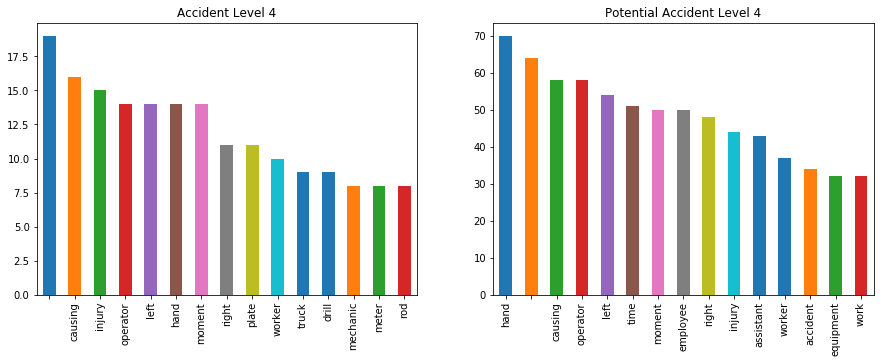

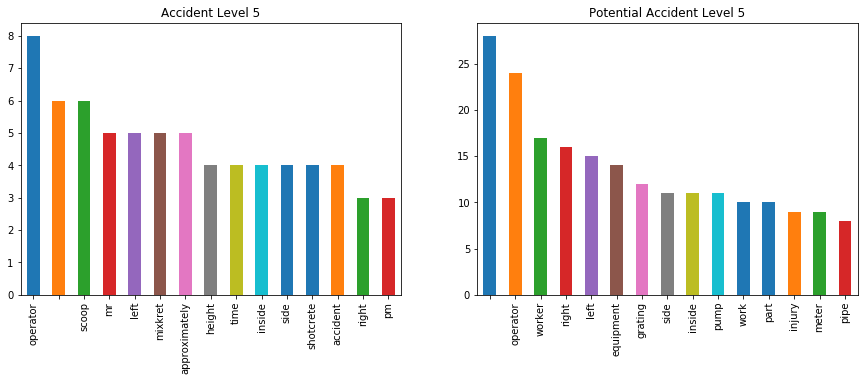

In [37]:
#fig, axes = plt.subplots(nrows=5, ncols=2)
for i in range(len(AL.index)):
    #plt.figure(i-1)
    f, axs = plt.subplots(1, 2, figsize=(15,5))
    plt.subplot(1, 2, 1)
    AL.iloc[i,:].sort_values(ascending=False).iloc[:15].plot(kind='bar')
    plt.title('Accident Level {0}' .format(i+1))
    plt.subplot(1, 2, 2)
    PAL.iloc[i,:].sort_values(ascending=False).iloc[:15].plot(kind='bar')
    plt.title('Potential Accident Level {0}' .format(i+1))
    plt.show()

This is a word cloud for each Accident Level and each Potential Accident Level. 
Plots show what the most common words by the size. 
Comparisons can be made between the Accident Level and the Potential Plot levels.

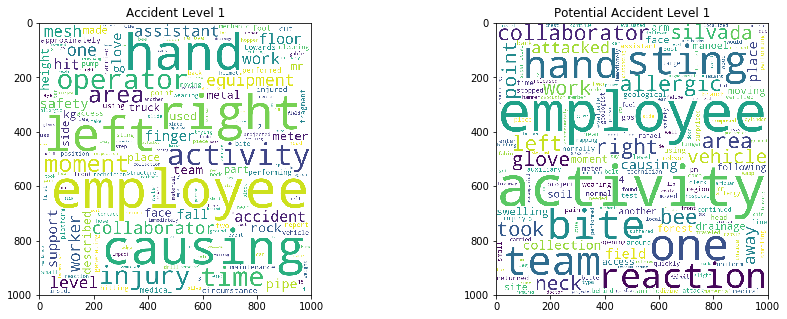

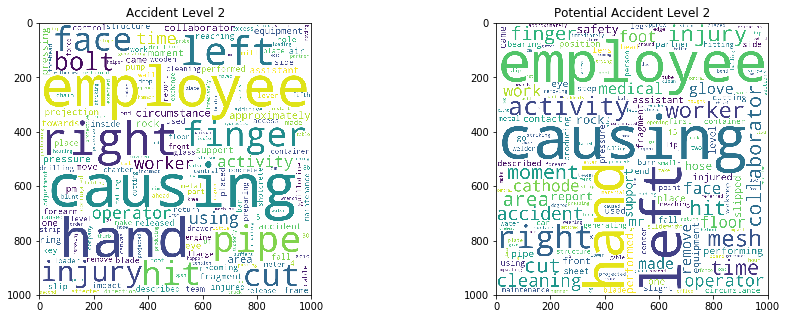

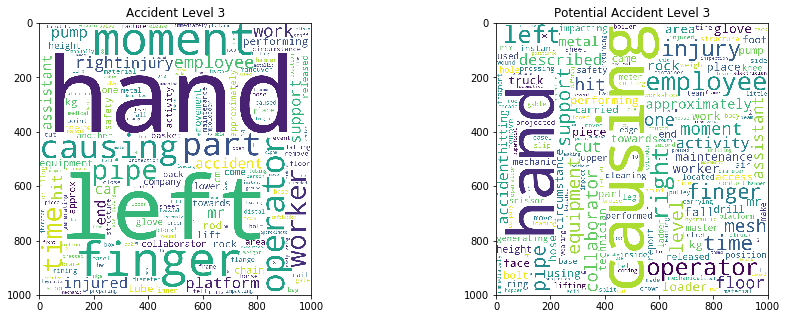

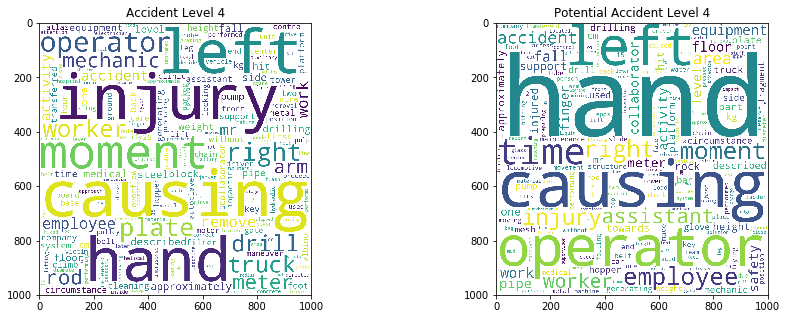

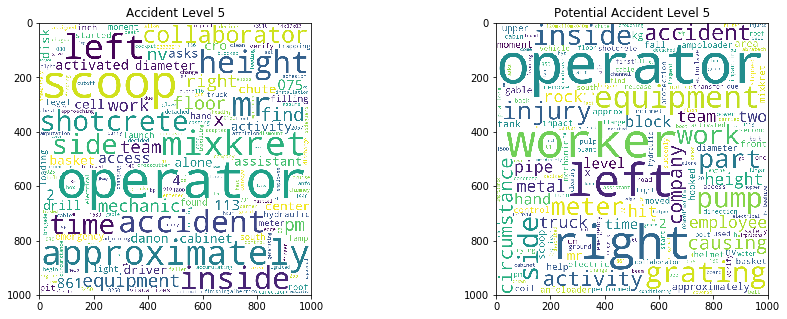

In [36]:
# Word Cloud:
for i in range(len(AL)):
    # Accident
    f, axs = plt.subplots(1, 2, figsize=(15,5))
    plt.subplot(1, 2, 1)
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color ='white').generate_from_frequencies(AL.iloc[i,:].dropna())
    plt.title('Accident Level {0}'.format(i+1))
    plt.imshow(wordcloud)
    # Potential Accident
    plt.subplot(1, 2, 2)
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color ='white').generate_from_frequencies(PAL.iloc[i,:].dropna())
    plt.title('Potential Accident Level {0}'.format(i+1))
    plt.imshow(wordcloud)
    plt.show()

In [71]:
X = data_wvect.drop(['Description', 'Accident Level', 'Date', 'Potential Accident Level'], axis=1)
Xcatcols = X.select_dtypes(include=['category']).columns
for cols in Xcatcols:
    X[cols] = X[cols].cat.codes
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(value=0)
y = data1['Accident Level']

In [166]:
# Undersampling
## Random
rus = RandomUnderSampler(random_state=42, return_indices=True)
X_usampled, y_usampled, idx_usampled = rus.fit_sample(X, y)
## Cluster
cc = ClusterCentroids(random_state=42)
X_ccsampled, y_ccsampled = cc.fit_sample(X, y)
## Nearmiss
nm = NearMiss(random_state=42)
X_nmsampled, y_nmsampled = nm.fit_sample(X, y)


# Oversampling
## Random
ros = RandomOverSampler(random_state=42)
X_osampled, y_osampled = ros.fit_sample(X, y)
## Smote
sm = SMOTE(random_state=42)
X_smsampled, y_smsampled = sm.fit_sample(X, y)


# Combine
## SMOTEENN
sme = SMOTEENN(random_state=42)
X_smesampled, y_smesampled = sme.fit_sample(X, y)
## SMOTETomek
smt = SMOTETomek(random_state=42)
X_smtsampled, y_smtsampled = smt.fit_sample(X, y)

rexlist = [X_usampled, X_ccsampled, X_nmsampled, X_osampled, X_smsampled, X_smesampled, X_smtsampled]
reylist = [y_usampled, y_ccsampled, y_nmsampled, y_osampled, y_smsampled, y_smesampled, y_smtsampled]
samplelist= ["Random Undersampling", "Cluster Centroid", "Near Miss", "Random Oversampling", "SMOTE", "SMOTE TENN", "SMOTE Tomek"]

Machine learning based on the description using a Bays Theorem Algorithm

In [167]:
X_trains = []; y_trains = []; X_tests = []; y_tests = []
for i in range(len(rexlist)):
    X_train, X_test, y_train, y_test = train_test_split(rexlist[i], #np.array(X)
                                                    reylist[i],
                                                    test_size=0.30,
                                                    random_state=53)
    X_trains.append(X_train)
    X_tests.append(X_test)
    y_trains.append(y_train)
    y_tests.append(y_test)
    
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
kv = KFold(n_splits=10, random_state=42)

trainlist = pd.DataFrame([samplelist, X_trains, X_tests, y_trains, y_tests]).transpose().\
                rename(columns={0:'Method', 1:'X_train', 2:'X_test', 3:'y_train', 4:'y_test'})

In [13]:
# Imbalanced Learn
from imblearn.pipeline import make_pipeline as make_pipeline_imb

from imblearn.metrics import classification_report_imbalanced
from sklearn.pipeline import make_pipeline

In [168]:
# Naive Bayes Multinomial
nb_classifier = MultinomialNB()
warnings.simplefilter("ignore")
import warnings  
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        nb_classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(nb_classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = nb_classifier.predict(trainlist.X_test[i])
        pred_of = nb_classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")


Random Undersampling:
Average Score = 10.00%
Trainset Comparison = 21.43%
Single prediction = 16.67%
             precision    recall  f1-score   support

          I       0.00      0.00      0.00         3
         II       0.17      1.00      0.29         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.00      0.00      0.00         3

avg / total       0.03      0.17      0.05        12

Cluster Centroid:
Resampling Method didn't work!

Near Miss:
Average Score = 10.00%
Trainset Comparison = 64.29%
Single prediction = 16.67%
             precision    recall  f1-score   support

          I       0.00      0.00      0.00         3
         II       0.18      1.00      0.31         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.00      0.00      0.00         3

avg / total       0.03      0.17      0.05        12

Random Over

In [116]:
# MAY NOTE NEED
#RandomForestClassifier
#MOTE(random_state=4, k_neighbors=2)
#count_train = vectorizer.fit_transform(X_train.values)
#count_test = vectorizer.transform(X_test.values)
display(len(trainlist.X_train[1]))
display(len(trainlist.y_train[1]))

28

28

In [169]:
# KNeighbors
classifier = KNeighborsClassifier(n_neighbors=7)
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")


Random Undersampling:
Average Score = 7.50%
Trainset Comparison = 39.29%
Single prediction = 16.67%
             precision    recall  f1-score   support

          I       0.00      0.00      0.00         3
         II       0.00      0.00      0.00         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       1.00      0.67      0.80         3

avg / total       0.25      0.17      0.20        12

Cluster Centroid:
Average Score = 5.00%
Trainset Comparison = 32.14%
Single prediction = 16.67%
             precision    recall  f1-score   support

          I       0.29      0.67      0.40         3
         II       0.00      0.00      0.00         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.00      0.00      0.00         3

avg / total       0.07      0.17      0.10        12

Near Miss:
Average Score = 7.50%
Trainset Comparison = 5

In [170]:
# SVM
classifier = svm.SVC()
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")

Random Undersampling:
Average Score = 10.00%
Trainset Comparison = 28.57%
Single prediction = 8.33%
             precision    recall  f1-score   support

          I       0.00      0.00      0.00         3
         II       0.11      0.50      0.18         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.00      0.00      0.00         3

avg / total       0.02      0.08      0.03        12

Cluster Centroid:
Average Score = 5.00%
Trainset Comparison = 25.00%
Single prediction = 25.00%
             precision    recall  f1-score   support

          I       0.00      0.00      0.00         3
         II       0.00      0.00      0.00         2
        III       0.29      1.00      0.44         2
         IV       0.50      0.50      0.50         2
          V       0.00      0.00      0.00         3

avg / total       0.13      0.25      0.16        12

Near Miss:
Average Score = 10.00%
Trainset Comparison = 

In [171]:
# Decision Tree
classifier = DecisionTreeClassifier()
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")


Random Undersampling:
Average Score = 15.00%
Trainset Comparison = 100.00%
Single prediction = 25.00%
             precision    recall  f1-score   support

          I       1.00      0.33      0.50         3
         II       0.00      0.00      0.00         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.33      0.67      0.44         3

avg / total       0.33      0.25      0.24        12

Cluster Centroid:
Average Score = 27.50%
Trainset Comparison = 100.00%
Single prediction = 58.33%
             precision    recall  f1-score   support

          I       1.00      0.67      0.80         3
         II       0.50      1.00      0.67         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.60      1.00      0.75         3

avg / total       0.48      0.58      0.50        12

Near Miss:
Average Score = 17.50%
Trainset Compariso

In [172]:
# Random Forest
classifier = RandomForestClassifier()
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")


Random Undersampling:
Average Score = 12.50%
Trainset Comparison = 100.00%
Single prediction = 16.67%
             precision    recall  f1-score   support

          I       0.00      0.00      0.00         3
         II       0.50      0.50      0.50         2
        III       0.50      0.50      0.50         2
         IV       0.00      0.00      0.00         2
          V       0.00      0.00      0.00         3

avg / total       0.17      0.17      0.17        12

Cluster Centroid:
Average Score = 10.00%
Trainset Comparison = 100.00%
Single prediction = 33.33%
             precision    recall  f1-score   support

          I       0.00      0.00      0.00         3
         II       0.50      0.50      0.50         2
        III       0.25      0.50      0.33         2
         IV       0.00      0.00      0.00         2
          V       0.40      0.67      0.50         3

avg / total       0.23      0.33      0.26        12

Near Miss:
Average Score = 10.00%
Trainset Compariso

In [173]:
# Bagging Classifier
base_estimator = DecisionTreeClassifier(); n_estimators = 10
classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")


Random Undersampling:
Average Score = 15.00%
Trainset Comparison = 96.43%
Single prediction = 25.00%
             precision    recall  f1-score   support

          I       0.20      0.33      0.25         3
         II       0.00      0.00      0.00         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.50      0.67      0.57         3

avg / total       0.18      0.25      0.21        12

Cluster Centroid:
Average Score = 15.00%
Trainset Comparison = 96.43%
Single prediction = 58.33%
             precision    recall  f1-score   support

          I       1.00      0.67      0.80         3
         II       0.50      1.00      0.67         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.60      1.00      0.75         3

avg / total       0.48      0.58      0.50        12

Near Miss:
Average Score = 10.00%
Trainset Comparison 

In [175]:
# Adaptive Boosting Classifier
classifier = AdaBoostClassifier(random_state=42)
classifier.fit(X_train, y_train)
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")

Random Undersampling:
Average Score = 10.00%
Trainset Comparison = 53.57%
Single prediction = 16.67%
             precision    recall  f1-score   support

          I       1.00      0.33      0.50         3
         II       0.00      0.00      0.00         2
        III       0.10      0.50      0.17         2
         IV       0.00      0.00      0.00         2
          V       0.00      0.00      0.00         3

avg / total       0.27      0.17      0.15        12

Cluster Centroid:
Average Score = 22.50%
Trainset Comparison = 78.57%
Single prediction = 66.67%
             precision    recall  f1-score   support

          I       1.00      0.67      0.80         3
         II       0.67      1.00      0.80         2
        III       0.50      0.50      0.50         2
         IV       0.00      0.00      0.00         2
          V       0.60      1.00      0.75         3

avg / total       0.59      0.67      0.60        12

Near Miss:
Average Score = 15.00%
Trainset Comparison 

In [177]:
# Gradient Tree Boosting Classifier
n_estimators = 100
classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")

Random Undersampling:
Average Score = 17.50%
Trainset Comparison = 100.00%
Single prediction = 41.67%
             precision    recall  f1-score   support

          I       1.00      0.67      0.80         3
         II       0.33      0.50      0.40         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       1.00      0.67      0.80         3

avg / total       0.56      0.42      0.47        12

Cluster Centroid:
Average Score = 45.00%
Trainset Comparison = 100.00%
Single prediction = 41.67%
             precision    recall  f1-score   support

          I       1.00      0.67      0.80         3
         II       0.00      0.00      0.00         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.60      1.00      0.75         3

avg / total       0.40      0.42      0.39        12

Near Miss:
Average Score = 17.50%
Trainset Compariso

In [179]:
# XG Boost Classifier
## Import
import xgboost as xgb
#yd_train = data2.Description.astype('category').cat.codes
#dtrain = xgb.DMatrix(np.array(X_train), label=np.array(y_train))
#dtest = xgb.DMatrix(np.array(X_test), label=np.array(y_test))
## Classifier
#param = {'max_depth': 2, 'eta': 1, 'silent': 1}
classifier = xgb.XGBClassifier()
#evallist = [(dtest, 'eval'), (dtrain, 'train')]
#bst = xgb.train(param, dtrain, num_round)
warnings.simplefilter("ignore") 
for i in range(len(rexlist)):    
    print(trainlist.Method[i]+":")
    try:
        classifier.fit(trainlist.X_train[i], trainlist.y_train[i])
        scores = cross_val_score(classifier, trainlist.X_test[i], trainlist.y_test[i], cv=cv, n_jobs=-1)
        pred = classifier.predict(trainlist.X_test[i])
        pred_of = classifier.predict(trainlist.X_train[i])
        print("Average Score = {0:.2f}%" .format(scores.mean()*100))
        print("Trainset Comparison = {0:.2f}%" .format(metrics.accuracy_score(trainlist.y_train[i], pred_of)*100))
        print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(trainlist.y_test[i], pred)*100))
        print(metrics.classification_report(trainlist.y_test[i], pred))
    except:
        print("Resampling Method didn't work!\n")

Random Undersampling:
Average Score = 17.50%
Trainset Comparison = 100.00%
Single prediction = 33.33%
             precision    recall  f1-score   support

          I       0.50      0.33      0.40         3
         II       0.00      0.00      0.00         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.60      1.00      0.75         3

avg / total       0.27      0.33      0.29        12

Cluster Centroid:
Average Score = 20.00%
Trainset Comparison = 100.00%
Single prediction = 58.33%
             precision    recall  f1-score   support

          I       1.00      1.00      1.00         3
         II       0.33      0.50      0.40         2
        III       0.00      0.00      0.00         2
         IV       0.00      0.00      0.00         2
          V       0.60      1.00      0.75         3

avg / total       0.46      0.58      0.50        12

Near Miss:
Average Score = 30.00%
Trainset Compariso

In [ ]:
# Voting Classifier
base_estimator = DecisionTreeClassifier(); n_estimators = 100
bag_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
bag_classifier.fit(X_train, y_train)
## Predict
pred_bag = bag_classifier.predict(X_test)
pred_bag_of = bag_classifer.predict(X_train)
## Scores
scores = cross_val_score(bag_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_bag_of = bag_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_bag_of))
print(metrics.accuracy_score(y_test, pred_bag))
print(metrics.classification_report(y_test, pred_bag))

In [319]:
from sklearn.decomposition import PCA
pca_classifier = PCA(n_components=2)
pca_classifier.fit(X_train)
X_train_pca = pca_classifier.transform(X_train)
X_test_pca = pca_classifier.transform(X_test)

In [460]:
# This is just for testing ideas
#pd.DataFrame(ALIS.loc['I', 'Metals']/tot.rename('J')).plot(kind='bar')
test = ALIS
_ = (test.loc['I', 'Metals']/tot).rename(j)
for j in test.loc['I'].index:
    _ = (test.loc['I', j]/tot).rename(j)    
    test.loc['I', j] = _
print(ALIS.loc['I', 'Metals'].dropna())

01            0.333333
0130          1.000000
02bp0166      1.000000
02bp0167      1.000000
03            0.333333
04            0.333333
0400          1.000000
0430          1.000000
051917        1.000000
069           1.000000
07            0.500000
07182016      1.000000
08fi0502      1.000000
09            0.500000
1             0.222222
1000          0.333333
1122          1.000000
12            0.166667
13            0.500000
1340          1.000000
14            1.000000
1416          1.000000
1425          1.000000
1440          1.000000
15            0.055556
16            0.500000
160m          1.000000
17            1.000000
1840          0.500000
1st           0.666667
                ...   
water         0.200000
wear          1.000000
wearing       0.047619
weevil        1.000000
weight        0.058824
weld          1.000000
welder        0.083333
well          0.200000
went          0.428571
wheel         0.250000
willing       1.000000
window        0.500000
withdrawal 

In [51]:
d = np.zeros(len(data1.loc[0, 'Description']), dtype='U30')
d[1] = 'Cat'
zs

['removing',
 'drill',
 'rod',
 'jumbo',
 '08',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'mechanic',
 'support',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hand',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slide',
 'point',
 'support',
 'tightens',
 'finger',
 'mechanic',
 'drilling',
 'bar',
 'beam',
 'jumbo',
 'activation',
 'sodium',
 'sulphide',
 'pump',
 'piping',
 'wa',
 'uncoupled',
 'sulfide',
 'solution',
 'wa',
 'designed',
 'area',
 'reach',
 'maid',
 'immediately',
 'made',
 'use',
 'emergency',
 'shower',
 'wa',
 'directed',
 'ambulatory',
 'doctor',
 'later',
 'hospital',
 'note',
 'sulphide',
 'solution',
 '',
 '48',
 'gram',
 '',
 'liter',
 'substation',
 'milpo',
 'located',
 'level',
 '170',
 'collaborator',
 'wa',
 'excavation',
 'work',
 'pick',
 'hand',
 'tool',
 'hitting',
 'rock',
 'flat',
 'part',
 'beak',
 'bounce',
 'hitting',
 'steel',
 'tip'

In [11]:
# MAY NOT NEED
vectorizer = TfidfVectorizer(min_df=1, stop_words = stop_words) #Initiating TfidfVectorizer

izerdef industryTfidf(data=data1):
    count = 0
    for i in uniIndustry:
        #for j in uniAccident:
        count += 1
        matrix = vectorizer.fit_transform(data[(data['Industry Sector'] == i) & (data['Accident Level'] == 'I')]['Description'])
        idf = pd.DataFrame(vectorizer.idf_)
        a = pd.DataFrame(vectorizer.get_feature_names())
        b = pd.concat([a, idf], axis=1, ignore_index=True).set_index(0).sort_values(1, ascending=False)\
                  .rename(columns={1:i}).rename_axis('word')
        if count >= 2:
            g = g.join(b, how='outer')
        else:
            g = b  
    return g

SyntaxError: invalid syntax (<ipython-input-11-aa9cce7c0d97>, line 3)

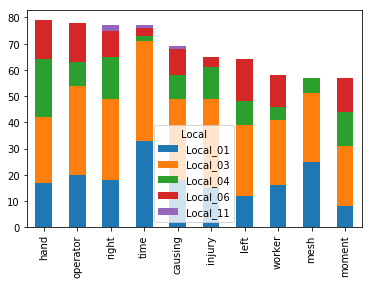

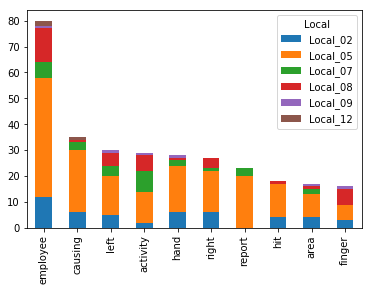

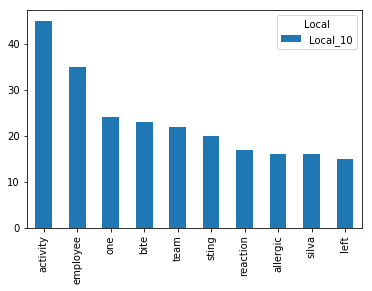

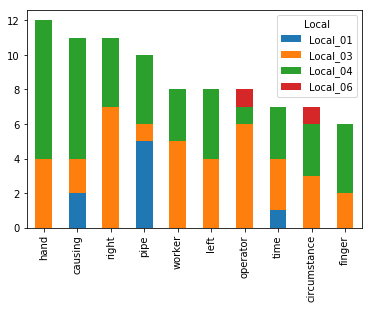

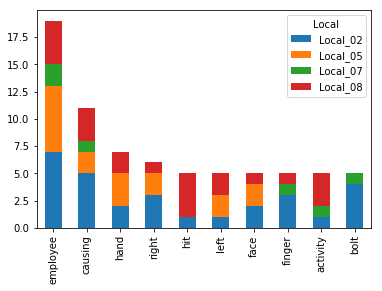

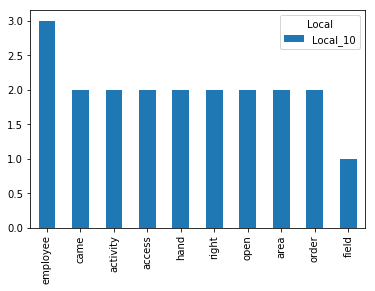

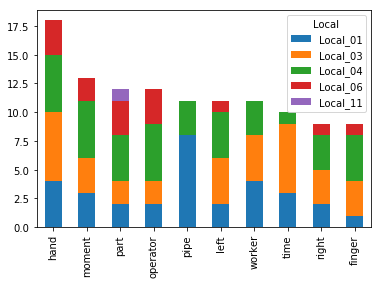

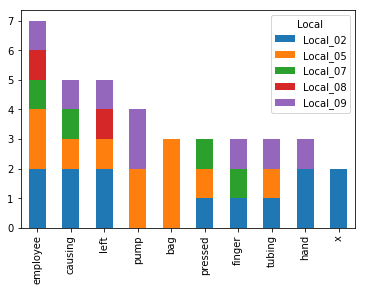

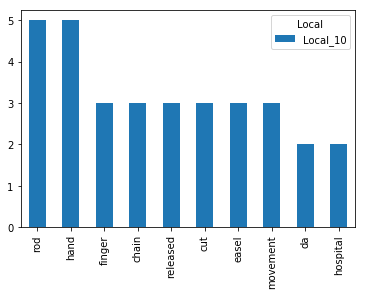

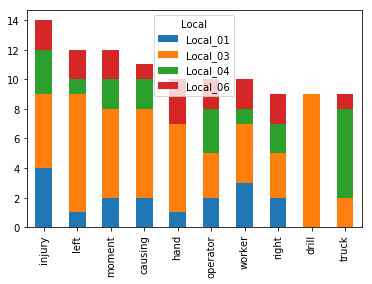

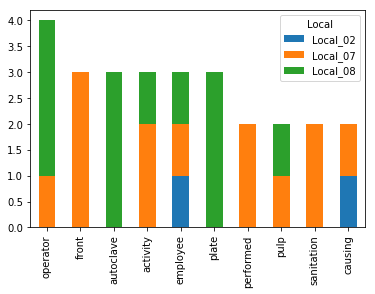

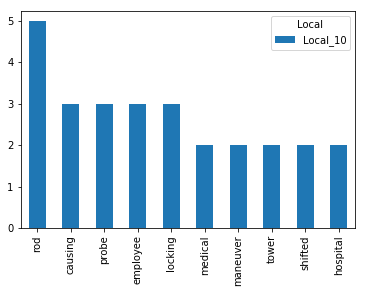

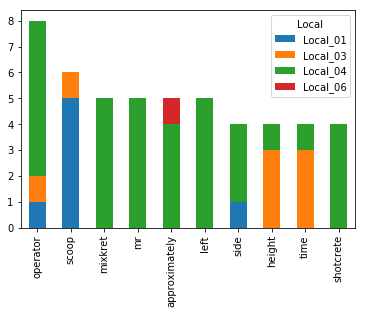

In [545]:
for i in ALCL.index.get_level_values(level=0).unique():
    for j in ALCL.loc[i].index.get_level_values(level=0).unique():
        #plt.subplot(1, 3, j+1)
        a = list(ALCL.loc[i].index.get_level_values(level=0).unique())
        tot = ALCL.loc[i, j].sum().rename('Total')
        ALCL.loc[i, j].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                      .drop('Total').iloc[:, :10].transpose()\
                      .plot(kind='bar', stacked=True)
        #plt.title('Accident Level {0}' .format(i))
        plt.show()

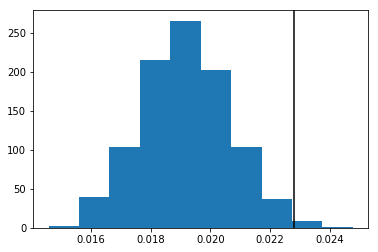

In [108]:
C12 = np.nanmean(abs(data2.groupby('Countries').mean().loc['Country_01'] - data2.groupby('Countries').mean().loc['Country_02']))
plt.hist(t, normed=True)
plt.axvline(C12, color='black')
plt.show()

In [10]:
# MAY NOT NEED:
uniCountry = data1.loc[:,'Countries'].unique()
uniLocal = data1.loc[:,'Local'].unique()
uniIndustry = data1.loc[:, 'Industry Sector'].unique()
uniAccident = data1.loc[:, 'Accident Level'].unique()
b
g = b.rename_axis('word')
#g = g.merge(b, right_index=True, left_index=True, how='outer')
#g.merge(b, right_index=True, left_index=True, how='outer')
#str(count)
g = g.join(b, how='outer', lsuffix='_l', rsuffix='_r')
g.join(b, how='outer')

AttributeError: 'str' object has no attribute 'rename_axis'

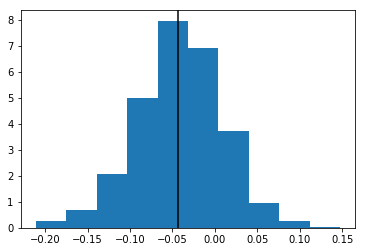

In [184]:
plt.hist(t, normed=True)
g = industryTfidf(data=data1)
MM = np.mean(g.loc[:, 'Metals'] - g.loc[:, 'Mining'])
MO = np.mean(g.loc[:, 'Metals'] - g.loc[:, 'Others'])
OM = np.mean(g.loc[:, 'Others'] - g.loc[:, 'Mining'])
ava = np.mean([MM, MO, OM])
plt.axvline(ava, color='black')
plt.show()

In [356]:
ALIS_T = data_wcount.groupby(['Accident Level', 'Industry Sector']).sum()
for i in ALIS_T.index.get_level_values(level=0).unique():
    #fig, ax = plt.subplots(1, 2, 2)
    tot = ALIS_T.loc[i].sum().rename('Total')
    for j in ALIS_T.loc[i].index:
        _ = (ALIS_T.loc[i, j]/tot).rename(j)    
        ALIS_T.loc[i, j] = _
    ALIS_T.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

TypeError: cannot append a non-category item to a CategoricalIndex

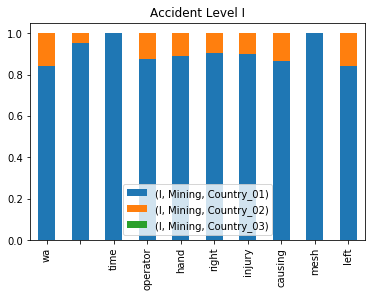

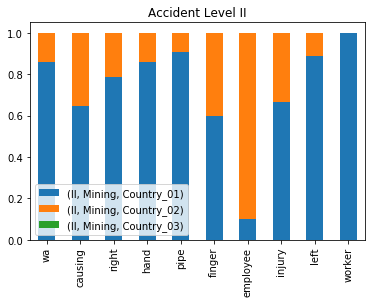

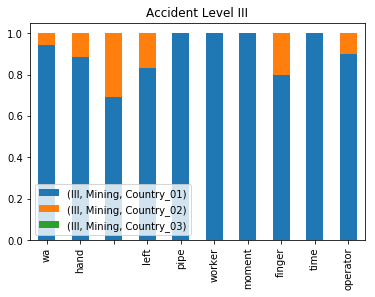

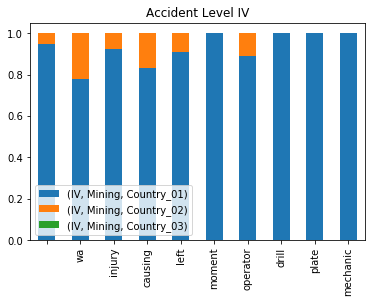

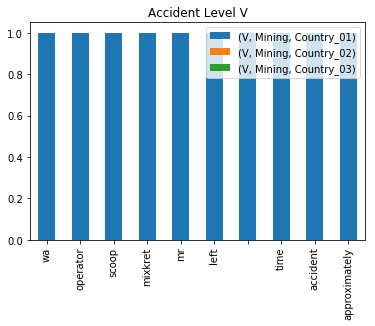

In [361]:
# Mining
IS = 'Mining'
ALIC = data1.groupby(['Accident Level', 'Industry Sector', 'Countries']).sum()
for i in ALIC.index.get_level_values(level=0).unique():
    #for k in ALIC.index.get_level_values(level=1).unique():
    tot = ALIC.loc[i, IS].sum().rename('Total')
    for j in ALIC.loc[i, IS].index:
        _ = (ALIC.loc[i, IS, j]/tot).rename(j)    
        ALIC.loc[i, IS, j] = _
    ALIC.loc[i, IS, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

In [364]:
for i in PALIS.index.get_level_values(level=0).unique():    
    tot = PALIS.loc[i].sum().rename('Total')
    PALIS.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                   .drop('Total').iloc[:, :10].transpose()\
                   .plot(kind='bar', stacked=True)
    plt.title('Potential Accident Level {0}' .format(i))
    plt.show()

TypeError: cannot append a non-category item to a CategoricalIndex

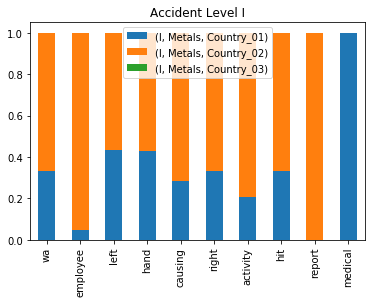

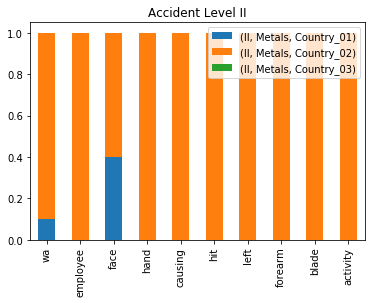

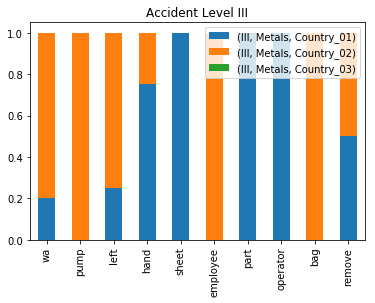

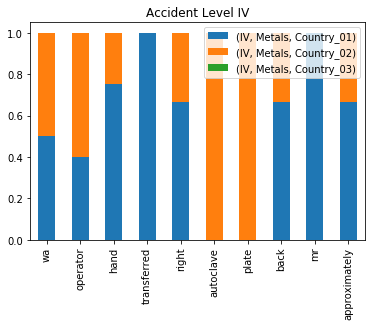

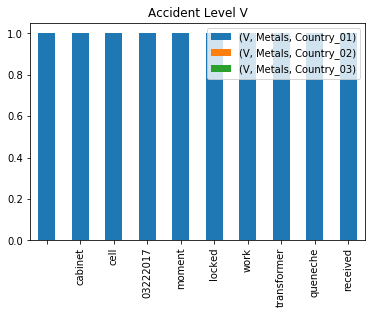

In [362]:
# Metals
IS = 'Metals'
ALIC = data1.groupby(['Accident Level', 'Industry Sector', 'Countries']).sum()
for i in ALIC.index.get_level_values(level=0).unique():
    #for k in ALIC.index.get_level_values(level=1).unique():
    #fig, ax = plt.subplots(1, 2, 2)
    tot = ALIC.loc[i, IS].sum().rename('Total')
    for j in ALIC.loc[i, IS].index:
        _ = (ALIC.loc[i, IS, j]/tot).rename(j)    
        ALIC.loc[i, IS, j] = _
    ALIC.loc[i, IS, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

In [337]:
ALIS = data1.groupby(['Accident Level', 'Industry Sector']).sum()
for i in ALIS.index.get_level_values(level=0).unique():    
    tot = ALIS.loc[i].sum().rename('Total')
    ALIS.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                   .drop('Total').iloc[:, :10].transpose()\
                   .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

TypeError: cannot append a non-category item to a CategoricalIndex

In [363]:
for i in ALC.index.get_level_values(level=0).unique():
    #plt.figure()
    tot = ALC.loc[i].sum().rename('Total')
    ALC.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

TypeError: cannot append a non-category item to a CategoricalIndex

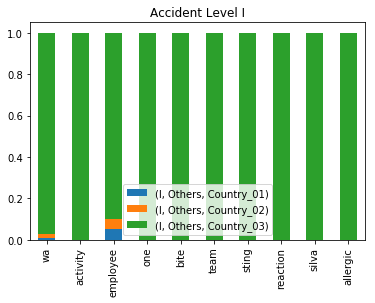

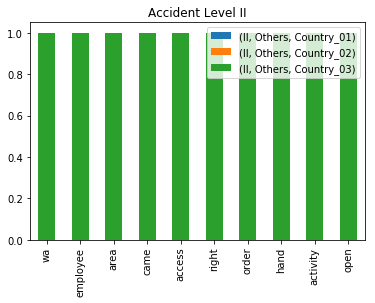

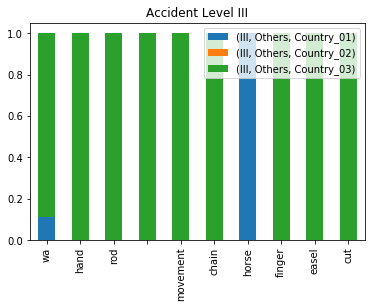

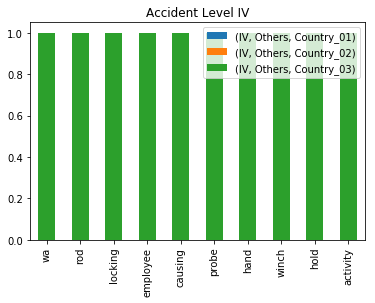

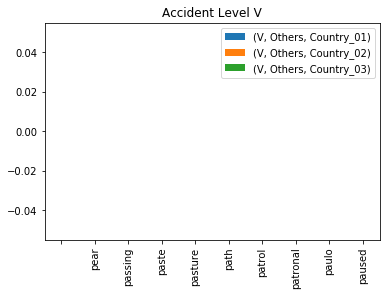

In [360]:
# Others
IS = 'Others'
ALIC = data1.groupby(['Accident Level', 'Industry Sector', 'Countries']).sum()
for i in ALIC.index.get_level_values(level=0).unique():
    if IS in ALIC.loc[i].index.get_level_values(level=0).unique():
        #for k in ALIC.index.get_level_values(level=1).unique():
        #fig, ax = plt.subplots(1, 2, 2)
        tot = ALIC.loc[i, IS].sum().rename('Total')
        for j in ALIC.loc[i, IS].index:
            _ = (ALIC.loc[i, IS, j]/tot).rename(j)    
            ALIC.loc[i, IS, j] = _
        ALIC.loc[i, IS, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                      .drop('Total').iloc[:, :10].transpose()\
                      .plot(kind='bar', stacked=True)
        plt.title('Accident Level {0}' .format(i))
        plt.show()

In [283]:
mivs = np.nanmean(abs(data2.groupby('Industry Sector').mean().loc['Metals'] - /
                      data2.groupby('Industry Sector').mean()))
num = 1000
t12 = np.zeros(num); t13 = np.zeros(num); t23 = np.zeros(num)
for _ in range(num):
    bs_index = np.random.choice(data2.index, size=len(data2))
    bs_data = data2.iloc[bs_index]
    C1 = bs_data.groupby('Countries').mean().loc['Country_01']
    C2 = bs_data.groupby('Countries').mean().loc['Country_02']
    C3 = bs_data.groupby('Countries').mean().loc['Country_03']
    t12[_] = np.nanmean(abs(C1 - C2))
    t13[_] = np.nanmean(abs(C1 - C3))
    t23[_] = np.nanmean(abs(C2 - C3))

SyntaxError: invalid syntax (<ipython-input-283-e0e9649ca732>, line 1)

In [14]:
num = 100

t = np.zeros(num)
for _ in range(num):
    bs_index = np.random.choice(data2.index, size=len(data2))
    bs_data = data2.iloc[bs_index]
    C1 = bs_data.groupby('Countries').mean().loc['Country_01']
    C2 = bs_data.groupby('Countries').mean().loc['Country_02']
    C3 = bs_data.groupby('Countries').mean().loc['Country_03']
    C12 = np.nanmean(abs(C1 - C2))
    C13 = np.nanmean(abs(C1 - C3))
    C23 = np.nanmean(abs(C2 - C3))
    t[_] = np.mean([C12, C13, C23])

plt.hist(t, normed=True)
plt.show()

(array([  88.25833683,  154.45208946,  132.38750525,  264.7750105 ,
         441.29168417,  242.71042629,  397.16251575,  242.71042629,
         132.38750525,  110.32292104]),
 array([ 0.01344274,  0.01389596,  0.01434917,  0.01480239,  0.0152556 ,
         0.01570882,  0.01616203,  0.01661525,  0.01706846,  0.01752168,
         0.01797489]),
 <a list of 10 Patch objects>)

In [206]:
def diffIndy_bs(num):
    t = np.zeros(num)
    for _ in range(num):
        bs_index = np.random.choice(data1.index, size=len(data1))
        bs_data = industryTfidf(data=data1.iloc[bs_index,:])
        MM = np.nanmean(bs_data.loc[:, 'Metals'] - bs_data.loc[:, 'Mining'])
        MO = np.nanmean(bs_data.loc[:, 'Metals'] - bs_data.loc[:, 'Others'])
        OM = np.nanmean(bs_data.loc[:, 'Others'] - bs_data.loc[:, 'Mining'])
        t[_] = np.mean([MM, MO, OM])
    return t
bb = diffIndy_bs(num)

KeyboardInterrupt: 